In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #graphs and visualizations
import seaborn as sns #graphs and visualizations
import sklearn
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


# Uploading the Dataset 

In [2]:
insurance_data = pd.read_csv('../input/insurance/insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We can convert variables like 'sex' and 'smoker' into numeric form for our regression analysis.

In [3]:
insurance_data.sex[insurance_data.sex == 'male'] = 1
insurance_data.sex[insurance_data.sex == 'female'] = 2
insurance_data.smoker[insurance_data.smoker == 'yes'] = 1
insurance_data.smoker[insurance_data.smoker == 'no'] = 0
insurance_data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


# Data Analysis

In [4]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


From the above data, we can infer that the average age is 39 years, average bmi is 30, people have one child on an average. The average insurance cost is 13270.42 units with 75% of the observations near 16639.91 units.

In [5]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values.

Text(0, 0.5, 'frequency')

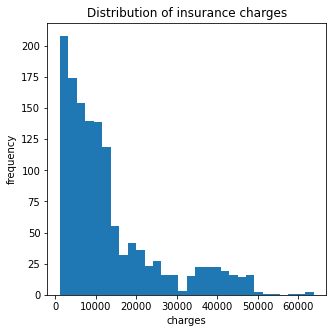

In [6]:
plt.figure(figsize = (5,5))
plt.hist(insurance_data.charges, bins = 'auto')
plt.title("Distribution of insurance charges")
plt.xlabel("charges")
plt.ylabel("frequency")

**INFERENCES :**

* Unevenly distributed histogram.
* Most of the insurance charges lie towards the lower end near the mean value 13270

In [7]:
insurance_data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [8]:
insurance_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
insurance_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Since there are four different regions, we can include that in our analysis by converting them into numeric variables as well but let us first see if it is necessary to include this factor.

<AxesSubplot:xlabel='region', ylabel='charges'>

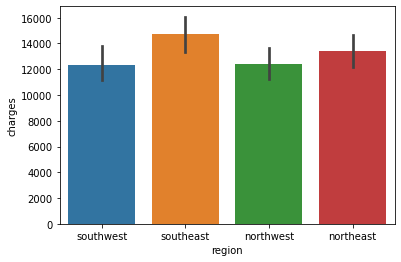

In [10]:
sns.barplot(x=insurance_data['region'],y=insurance_data['charges'])

<AxesSubplot:xlabel='region', ylabel='smoker'>

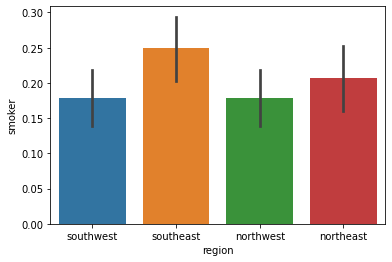

In [11]:
sns.barplot(x=insurance_data['region'],y=insurance_data['smoker'])

**INFERENCES :**

* There is a striking correspondence between insurance charges and no of smokers across regions.
* Not a lot of deviation in insurance charges across different regions.

Thus, we can safely assume that the data of regions will not have a huge impact on our model.

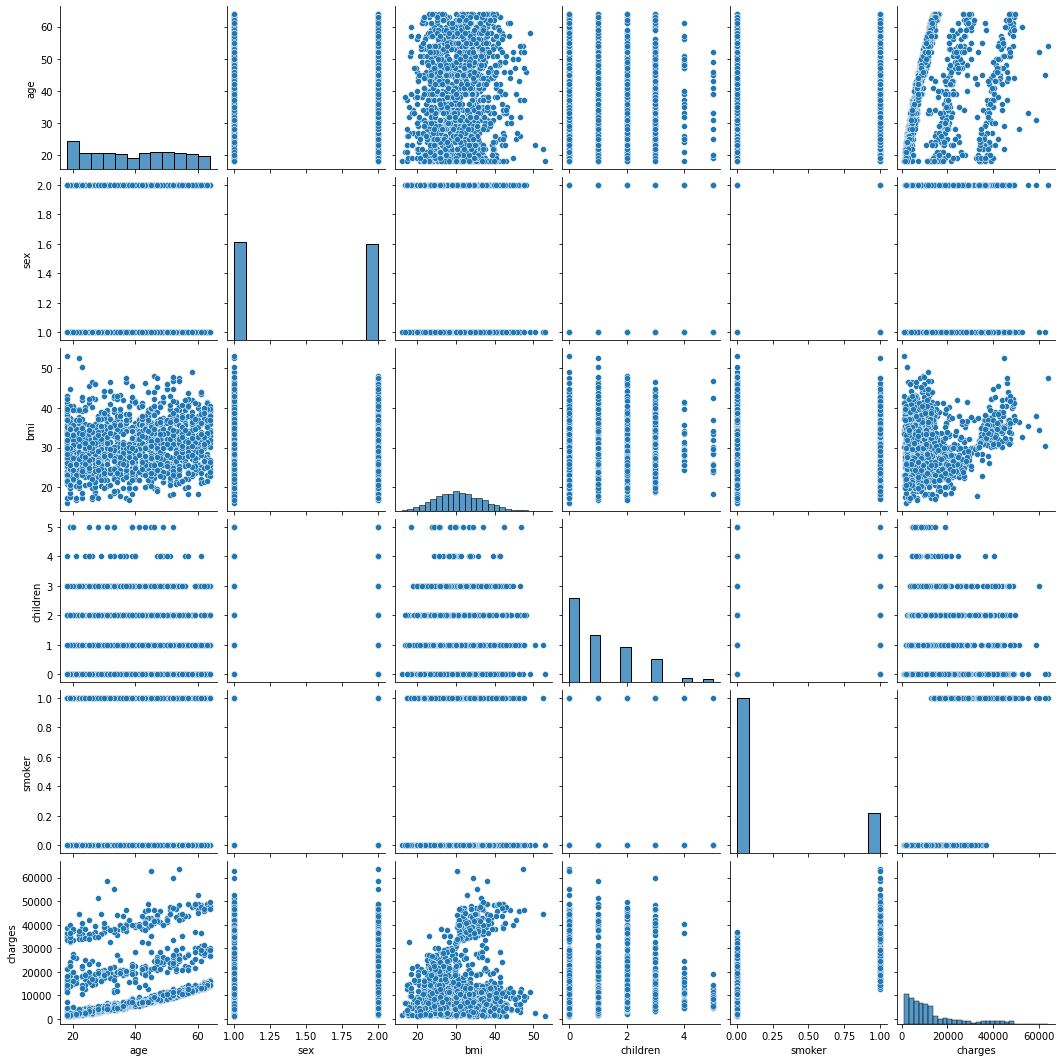

In [12]:
sns.pairplot(insurance_data)

From the above plots, we can obtain the following information:

1. As age increases the insurance charges are roughly increasing.This is usually the observation in real life too. Usually as a person gets older, there are more health issues.

2. The sex of the person doesn't seem to affect the insurance charges by much. It has a smaller impact on the charges than other factors.

3. The insurance charges are also increasing with an increase in the bmi. This is also in line with real life, people with higher bmi usually have more health complications than the person with an average bmi. But this is not an accurate indicator as we do not know the actual height and weight of an individual and whether they have more weight due to being a gym bro or eating lays all night long.

4. Most people have no children and a very small percentage of the people have 5 children. The distribution of charges is similar across people with different number of children, with slightly lower charges for people with 5 children.

5. The average insurance charge for a smoker is higher than that of a non-smoker. This could be because smoking can lead to other serious health issues like cancer and even weaken the immune system.

Based on the above inferences, and trying to avoid taking binary variables as factors in our regression model, we drop the variables of 'sex' , 'region'. Further, we divide the dataset into two - 
1. Containing non-smokers
2. Containing smokers. 

We will perform linear regression on both the datasets using 'age' and 'bmi' as the regression variables and compare the results.

In [13]:
new_data = insurance_data.drop(['region','sex','smoker'],axis=1) #dropping the region and sex column
new_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [14]:
smoker_data = new_data.loc[insurance_data['smoker']==1]
smoker_data.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [15]:
nonsmoker_data = new_data.loc[insurance_data['smoker']==0]
nonsmoker_data.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


Mean insurance charges in case of smokers = $32,050

Mean insurance charges in case of non-smokers = $8,434

<AxesSubplot:title={'center':'Charges vs Age (Smoker)'}, xlabel='age', ylabel='charges'>

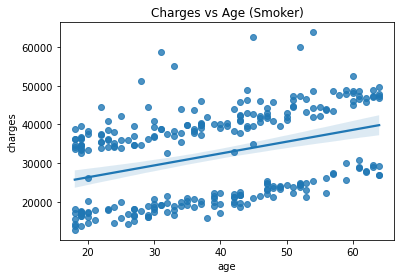

In [16]:
plt.title('Charges vs Age (Smoker)')
sns.regplot(x=smoker_data['age'],y=smoker_data['charges'])

<AxesSubplot:title={'center':'Charges vs Age (Non-Smoker)'}, xlabel='age', ylabel='charges'>

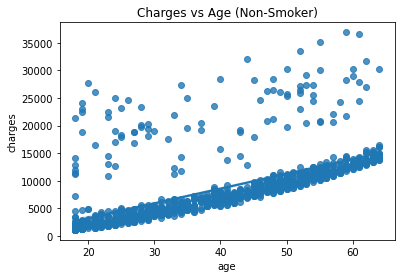

In [17]:
plt.title('Charges vs Age (Non-Smoker)')
sns.regplot(x=nonsmoker_data['age'],y=nonsmoker_data['charges'])

As we can see there is positive relationship between charges and age for both smokers and non-smokers but smokers have higher insurance charges on average.

<AxesSubplot:title={'center':'Charges vs BMI (Smoker)'}, xlabel='bmi', ylabel='charges'>

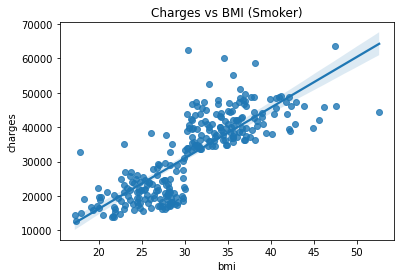

In [18]:
plt.title('Charges vs BMI (Smoker)')
sns.regplot(x=smoker_data['bmi'],y=smoker_data['charges'])

<AxesSubplot:title={'center':'Charges vs BMI (Non-Smoker)'}, xlabel='bmi', ylabel='charges'>

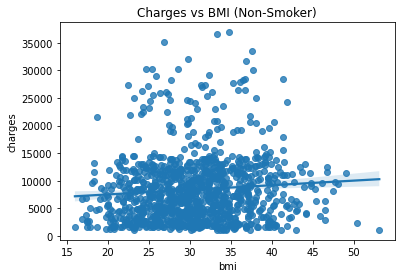

In [19]:
plt.title('Charges vs BMI (Non-Smoker)')
sns.regplot(x=nonsmoker_data['bmi'],y=nonsmoker_data['charges'])

We can see that for smokers, BMI is a crucial factor in determining the insurance charges whereas in case of non-smokers, BMI does not play a major role in determining insurance charges.

# Outlier Detection

For Non-smoker dataset

<AxesSubplot:ylabel='charges'>

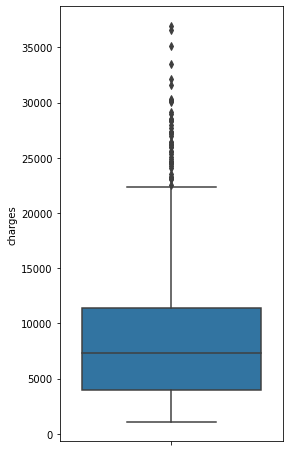

In [20]:
plt.figure(figsize = (4,8))
sns.boxplot(y = nonsmoker_data.charges)

In [21]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [22]:
out_std(nonsmoker_data,'charges')

The lower bound value is -9547.0771597286
The upper bound value is 26415.61375544101
Total number of outliers are 24


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


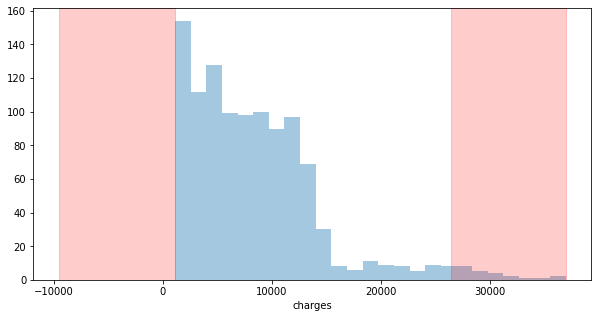

In [23]:
plt.figure(figsize = (10,5))
sns.distplot(nonsmoker_data['charges'], kde=False)
plt.axvspan(xmin = lower,xmax= nonsmoker_data['charges'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= nonsmoker_data['charges'].max(),alpha=0.2, color='red')

In [24]:
#removing outliers from the non-smoker dataset
ns_new = nonsmoker_data[(nonsmoker_data['charges'] < upper) | (nonsmoker_data['charges'] > lower)]

For Smoker Dataset

<AxesSubplot:ylabel='charges'>

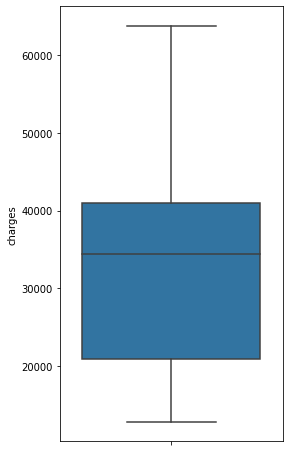

In [25]:
plt.figure(figsize = (4,8))
sns.boxplot(y = smoker_data.charges)

In [26]:
out_std(smoker_data,'charges')

The lower bound value is -2574.4096952345244
The upper bound value is 66674.8733583002
Total number of outliers are 0


There are no outliers in the smokers dataset

# Linear Regression Non-smokers dataset

In [27]:
x = nonsmoker_data.drop(['charges',], axis = 1) 
y = nonsmoker_data.charges

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
x, y = np.array(x), np.array(y)
x = sm.add_constant(x)
x = x.astype('float64')

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = None)
linear_reg = LinearRegression().fit(x_train,y_train)
y_train_predict = linear_reg.predict(x_train)
y_test_pred = linear_reg.predict(x_test)

In [30]:
x_final_train = sm.add_constant(x_train)
ols_train = sm.OLS(y_train, x_final_train)
ols_final_train = ols_train.fit()
print(ols_final_train.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     147.4
Date:                Tue, 24 May 2022   Prob (F-statistic):           7.30e-75
Time:                        12:53:34   Log-Likelihood:                -7355.6
No. Observations:                 744   AIC:                         1.472e+04
Df Residuals:                     740   BIC:                         1.474e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2610.0051    983.174     -2.655      0.0

In [31]:
ols_final_train.conf_int()

array([[-4540.14740449,  -679.86277067],
       [  231.0367397 ,   280.88767444],
       [  -43.84087851,    71.67324387],
       [  304.79858992,   872.37323678]])

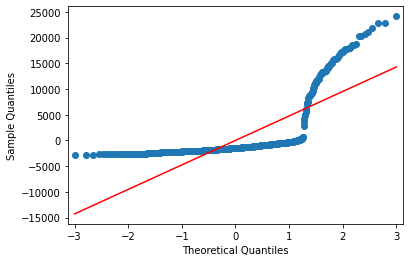

The mean of the residuals is -8.168e-12


In [32]:
res = ols_final_train.resid
fig = sm.qqplot(res,line='s')
plt.show()

mean_residuals = sum(res)/len(res)
print("The mean of the residuals is {:.4}".format(mean_residuals))

The nonsmokers dataset is not normally distributed, but the mean of residuals is close to zero.

In [33]:
from statsmodels.stats import diagnostic as diag
from statsmodels.compat import lzip
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(res, ols_final_train.model.exog)
print("Pval:",pval,"************ F_pval:", f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is Homoscedasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is no Homoscedasticity.")

Pval: 0.5808339441973855 ************ F_pval: 0.5822284500721702
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.5808
We fail to reject the null hypthoesis, so there is Homoscedasticity.


**Making Predictions of test set**

In [34]:
x_final_test = sm.add_constant(x_test)
ols_test = sm.OLS(y_test, x_final_test)
ols_final_test = ols_test.fit()
print(ols_final_test.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.32e-46
Time:                        12:53:35   Log-Likelihood:                -3124.9
No. Observations:                 320   AIC:                             6258.
Df Residuals:                     316   BIC:                             6273.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3426.3331   1371.482     -2.498      0.0

In [35]:
y_test_pred[:10].round(2)

array([ 2510.13,  8890.78,  5000.79,  8700.92, 11391.69,  2973.07,
       13011.42, 13596.64,  4119.62, 12694.55])

# Linear Regression for Smokers dataset

In [36]:
X = smoker_data.drop(['charges',], axis = 1) 
Y = smoker_data.charges
X, Y = np.array(X), np.array(Y)
X = sm.add_constant(X)
X = X.astype('float64')

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = None)
linear_reg_smoker = LinearRegression().fit(X_train,Y_train)
Y_train_predict = linear_reg_smoker.predict(X_train)
Y_test_pred = linear_reg_smoker.predict(X_test)

In [38]:
X_final_train = sm.add_constant(X_train)
ols_train_smoker = sm.OLS(Y_train, X_final_train)
ols_final_train_smoker = ols_train_smoker.fit()
print(ols_final_train_smoker.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     217.4
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.05e-60
Time:                        12:53:35   Log-Likelihood:                -1915.5
No. Observations:                 191   AIC:                             3839.
Df Residuals:                     187   BIC:                             3852.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.179e+04   2171.469    -10.036      0.0

In [39]:
ols_final_train_smoker.conf_int()

array([[-26075.84434878, -17508.39412958],
       [   206.90307159,    323.89854085],
       [  1286.99147706,   1533.61086656],
       [  -341.89060195,   1106.71226099]])

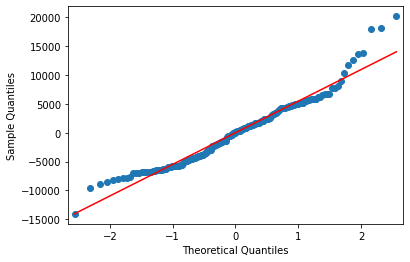

The mean of the residuals is -3.752e-12


In [40]:
res2 = ols_final_train_smoker.resid
fig = sm.qqplot(res2,line='s')
plt.show()

mean_residuals2 = sum(res2)/len(res2)
print("The mean of the residuals is {:.4}".format(mean_residuals2))

The smokers distribution is approximately normal in distribution and mean of the residuals is close to zero.

In [41]:
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(res2, ols_final_train_smoker.model.exog)
print("Pval:",pval,"************ F_pval:", f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is Homoscedasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is no Homoscedasticity.")

Pval: 0.7225058958969517 ************ F_pval: 0.7271954637703055
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.7225
We fail to reject the null hypthoesis, so there is Homoscedasticity.


**Making Predictions of test set**

In [42]:
X_final_test = sm.add_constant(X_test)
ols_test_smoker = sm.OLS(Y_test, X_final_test)
ols_final_test_smoker = ols_test_smoker.fit()
print(ols_final_test_smoker.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     61.50
Date:                Tue, 24 May 2022   Prob (F-statistic):           1.30e-20
Time:                        12:53:36   Log-Likelihood:                -842.20
No. Observations:                  83   AIC:                             1692.
Df Residuals:                      79   BIC:                             1702.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.495e+04   4310.526     -5.787      0.0

In [43]:
Y_test_pred[:10].round(2)

array([24808.14, 32952.77, 30594.56, 35631.19, 30427.57, 31436.78,
       24104.54, 37740.77, 39106.97, 40100.78])